<a href="https://colab.research.google.com/github/epignatelli/fenton_karma_autograd/blob/master/fenton_karma_jax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Colab runtime set to TPU accel
import requests
import os
if 'TPU_DRIVER_MODE' not in globals():
  url = 'http://' + os.environ['COLAB_TPU_ADDR'].split(':')[0] + ':8475/requestversion/tpu_driver_nightly'
  resp = requests.post(url)
  TPU_DRIVER_MODE = 1

# TPU driver as backend for JAX
from jax.config import config
config.FLAGS.jax_xla_backend = "tpu_driver"
config.FLAGS.jax_backend_target = "grpc://" + os.environ['COLAB_TPU_ADDR']
print(config.FLAGS.jax_backend_target)

grpc://10.25.239.42:8470


In [0]:
import os
import scipy.io as scio
import jax.numpy as np
import jax
import matplotlib.pyplot as plt

In [0]:
maxfloat = 1e6

def _params1():
    params = {
        "tau_v_plus": 3.33,  # Fast_inward_current_v_gate (ms)
        "tau_v1_minus": 19.6,  # Fast_inward_current_v_gate (ms)
        "tau_v2_minus": 1000,  # Fast_inward_current_v_gate (ms)
        "tau_w_plus": 667,  # Slow_inward_current_w_gate (ms)
        "tau_w_minus": 11,  # Slow_inward_current_w_gate (ms)
        "tau_d": NotImplemented,  # excitability
        "tau_0": 8.3,  # Slow_outward_current (ms)
        "tau_r": 50,  # Slow_outward_current (ms)
        "tau_si": 45,  # Slow_inward_current (ms)
        "k": 10,  # Slow_inward_current (dimensionless)
        "V_csi": 0.85,  # Slow_inward_current (dimensionless)
        "V_c": 0.13,
        "V_v": 0.0055,
        "Cm": 1,  # membrane capacitance (microF / cm^2)
    }
    return params


def params1a():
    params = _params1()
    params["tau_d"] = 0.41
    return params
    

def params1b():
    params = _params1()
    params["tau_d"] = 0.392 
    return params
    

def params1c():
    params = _params1()
    params["tau_d"] = 0.381
    return params
    

def params1d():
    params = _params1()
    params["tau_d"] = 0.36
    return params
    

def params1e():
    params = _params1()
    params["tau_d"] = 0.25
    return params


def params2():
    return {
        "tau_v_plus": 10,  # Fast_inward_current_v_gate (ms)
        "tau_v1_minus": 10,  # Fast_inward_current_v_gate (ms)
        "tau_v2_minus": 10,  # Fast_inward_current_v_gate (ms)
        "tau_w_plus": maxfloat,  # Slow_inward_current_w_gate (ms)
        "tau_w_minus": maxfloat,  # Slow_inward_current_w_gate (ms)
        "tau_d": 0.25,  # excitability
        "tau_0": 10,  # Slow_outward_current (ms)
        "tau_r": 190,  # Slow_outward_current (ms)
        "tau_si": maxfloat,  # Slow_inward_current (ms)
        "k": 100000,  # Slow_inward_current (dimensionless)
        "V_csi": maxfloat,  # Slow_inward_current (dimensionless)
        "V_c": 0.13,
        "V_v": maxfloat,
        "Cm": 1,  # membrane capacitance (microF / cm^2)
    }


def params3():
    return {
        "tau_v_plus": 3.33,  # Fast_inward_current_v_gate (ms)
        "tau_v1_minus": 19.6,  # Fast_inward_current_v_gate (ms)
        "tau_v2_minus": 1250,  # Fast_inward_current_v_gate (ms)
        "tau_w_plus": 870,  # Slow_inward_current_w_gate (ms)
        "tau_w_minus": 41,  # Slow_inward_current_w_gate (ms)
        "tau_d": 0.25,  # excitability
        "tau_0": 12.5,  # Slow_outward_current (ms)
        "tau_r": 33.33,  # Slow_outward_current (ms)
        "tau_si": 29,  # Slow_inward_current (ms)
        "k": 10,  # Slow_inward_current (dimensionless)
        "V_csi": 0.85,  # Slow_inward_current (dimensionless)
        "V_c": 0.13,
        "V_v": 0.04,
        "Cm": 1,  # membrane capacitance (microF / cm^2)
    }


def _params4():
    return {
        "tau_v_plus": 3.33,  # Fast_inward_current_v_gate (ms)
        "tau_v1_minus": 15.6,  # Fast_inward_current_v_gate (ms)
        "tau_v2_minus": 5,  # Fast_inward_current_v_gate (ms)
        "tau_w_plus": 350,  # Slow_inward_current_w_gate (ms)
        "tau_w_minus": 80,  # Slow_inward_current_w_gate (ms)
        "tau_d": NotImplemented,  # excitability
        "tau_0": 9,  # Slow_outward_current (ms)
        "tau_r": 34,  # Slow_outward_current (ms)
        "tau_si": 26.5,  # Slow_inward_current (ms)
        "k": 15,  # Slow_inward_current (dimensionless)
        "V_csi": 0.45,  # Slow_inward_current (dimensionless)
        "V_c": 0.15,
        "V_v": 0.04,
        "Cm": 1,  # membrane capacitance (microF / cm^2)
    }

def params4a():
    pass

def params4b():
    pass

def params4c():
    pass

def params5():
    return {
        "tau_v_plus": 3.33,  # Fast_inward_current_v_gate (ms)
        "tau_v1_minus": 12,  # Fast_inward_current_v_gate (ms)
        "tau_v2_minus": 2,  # Fast_inward_current_v_gate (ms)
        "tau_w_plus": 1000,  # Slow_inward_current_w_gate (ms)
        "tau_w_minus": 100,  # Slow_inward_current_w_gate (ms)
        "tau_d": 0.362,  # excitability
        "tau_0": 5,  # Slow_outward_current (ms)
        "tau_r": 33.33,  # Slow_outward_current (ms)
        "tau_si": 29,  # Slow_inward_current (ms)
        "k": 15,  # Slow_inward_current (dimensionless)
        "V_csi": 0.7,  # Slow_inward_current (dimensionless)
        "V_c": 0.13,
        "V_v": 0.04,
        "Cm": 1,  # membrane capacitance (microF / cm^2)
    }


def params6():
    return {
        "tau_v_plus": 3.33,  # Fast_inward_current_v_gate (ms)
        "tau_v1_minus": 9,  # Fast_inward_current_v_gate (ms)
        "tau_v2_minus": 8,  # Fast_inward_current_v_gate (ms)
        "tau_w_plus": 250,  # Slow_inward_current_w_gate (ms)
        "tau_w_minus": 60,  # Slow_inward_current_w_gate (ms)
        "tau_d": 0.395,  # excitability
        "tau_0": 9,  # Slow_outward_current (ms)
        "tau_r": 33.33,  # Slow_outward_current (ms)
        "tau_si": 29,  # Slow_inward_current (ms)
        "k": 15,  # Slow_inward_current (dimensionless)
        "V_csi": 0.5,  # Slow_inward_current (dimensionless)
        "V_c": 0.13,
        "V_v": 0.04,
        "Cm": 1,  # membrane capacitance (microF / cm^2)
    }


def params7():
    return {
        "tau_v_plus": 10,  # Fast_inward_current_v_gate (ms)
        "tau_v1_minus": 7,  # Fast_inward_current_v_gate (ms)
        "tau_v2_minus": 7,  # Fast_inward_current_v_gate (ms)
        "tau_w_plus": maxfloat,  # Slow_inward_current_w_gate (ms)
        "tau_w_minus": maxfloat,  # Slow_inward_current_w_gate (ms)
        "tau_d": 0.25,  # excitability
        "tau_0": 12,  # Slow_outward_current (ms)
        "tau_r": 100,  # Slow_outward_current (ms)
        "tau_si": maxfloat,  # Slow_inward_current (ms)
        "k": maxfloat,  # Slow_inward_current (dimensionless)
        "V_csi": maxfloat,  # Slow_inward_current (dimensionless)
        "V_c": 0.13,
        "V_v": maxfloat,
        "Cm": 1,  # membrane capacitance (microF / cm^2)
    }


def params8():
    return {
        "tau_v_plus": 13.03,  # Fast_inward_current_v_gate (ms)
        "tau_v1_minus": 19.6,  # Fast_inward_current_v_gate (ms)
        "tau_v2_minus": 1250,  # Fast_inward_current_v_gate (ms)
        "tau_w_plus": 800,  # Slow_inward_current_w_gate (ms)
        "tau_w_minus": 40,  # Slow_inward_current_w_gate (ms)
        "tau_d": 0.45,  # excitability
        "tau_0": 12.5,  # Slow_outward_current (ms)
        "tau_r": 33.25,  # Slow_outward_current (ms)
        "tau_si": 29,  # Slow_inward_current (ms)
        "k": 10,  # Slow_inward_current (dimensionless)
        "V_csi": 0.85,  # Slow_inward_current (dimensionless)
        "V_c": 0.13,
        "V_v": 0.04,
        "Cm": 1,  # membrane capacitance (microF / cm^2)
    }


def params9():
    return {
        "tau_v_plus": 3.33,  # Fast_inward_current_v_gate (ms)
        "tau_v1_minus": 15,  # Fast_inward_current_v_gate (ms)
        "tau_v2_minus": 2,  # Fast_inward_current_v_gate (ms)
        "tau_w_plus": 670,  # Slow_inward_current_w_gate (ms)
        "tau_w_minus": 61,  # Slow_inward_current_w_gate (ms)
        "tau_d": 0.25,  # excitability
        "tau_0": 12.5,  # Slow_outward_current (ms)
        "tau_r": 28,  # Slow_outward_current (ms)
        "tau_si": 29,  # Slow_inward_current (ms)
        "k": 10,  # Slow_inward_current (dimensionless)
        "V_csi": 0.45,  # Slow_inward_current (dimensionless)
        "V_c": 0.13,
        "V_v": 0.05,
        "Cm": 1,  # membrane capacitance (microF / cm^2)
    }


def params10():
    return {
        "tau_v_plus": 10,  # Fast_inward_current_v_gate (ms)
        "tau_v1_minus": 40,  # Fast_inward_current_v_gate (ms)
        "tau_v2_minus": 333,  # Fast_inward_current_v_gate (ms)
        "tau_w_plus": 1000,  # Slow_inward_current_w_gate (ms)
        "tau_w_minus": 65,  # Slow_inward_current_w_gate (ms)
        "tau_d": 0.115,  # excitability
        "tau_0": 12.5,  # Slow_outward_current (ms)
        "tau_r": 25,  # Slow_outward_current (ms)
        "tau_si": 22.22,  # Slow_inward_current (ms)
        "k": 10,  # Slow_inward_current (dimensionless)
        "V_csi": 0.85,  # Slow_inward_current (dimensionless)
        "V_c": 0.13,
        "V_v": 0.0025,
        "Cm": 1,  # membrane capacitance (microF / cm^2)
    }

In [0]:
params_test = {
    "Cm": 1,  # membrane capacitance (microF / cm^2)
    "V_c": 0.16,
    "V_v": 0.16,
    "tau_d": 0.125, # excitability
    "tau_v1_minus": 82.5,  # Fast_inward_current_v_gate (ms)
    "tau_v2_minus": 60,  # Fast_inward_current_v_gate (ms)
    "tau_v_plus": 5.75,  # Fast_inward_current_v_gate (ms)
    "tau_0": 32.5,  # Slow_outward_current (ms)
    "tau_r": 70,  # Slow_outward_current (ms)
    "tau_si": 114,  # Slow_inward_current (ms)
    "V_csi": 0.85,  # Slow_inward_current (dimensionless)
    "k": 10,  # Slow_inward_current (dimensionless)
    "tau_w_minus": 400,  # Slow_inward_current_w_gate (ms)
    "tau_w_plus": 300,  # Slow_inward_current_w_gate (ms)
    "D": 0.05,  # diffusivity
}

In [0]:
# @jax.jit
def init(width, height):
    shape = (width, height)
    v = np.ones(shape) * 0.99
    w = np.ones(shape) * 0.99
    u = np.zeros(shape)
    state = (v, w, u)   
    return state


@jax.jit
def step(state, t, params, D, stimuli, dt):
    v, w, u = state
    
    # apply stimulus
    u = stimulate(t, u, stimuli)

    # apply boundary conditions
    v = neumann(v)
    w = neumann(w)
    u = neumann(u)

    # gate variables
    p = np.greater_equal(u, params["V_c"])
    q = np.greater_equal(u, params["V_v"])
    tau_v_minus = (1 - q) * params["tau_v1_minus"] + q * params["tau_v2_minus"]
    
    d_v = ((1 - p) * (1 - v) / tau_v_minus) - ((p * v) / params["tau_v_plus"])
    d_w = ((1 - p) * (1 - w) / params["tau_w_minus"]) - ((p * w) / params["tau_w_plus"])
      
    # currents
    J_fi = - v * p * (u - params["V_c"]) * (1 - u) / params["tau_d"]
    J_so = (u * (1 - p) / params["tau_0"]) + (p / params["tau_r"])
    J_si = - (w * (1 + np.tanh(params["k"] * (u - params["V_csi"])))) / (2 * params["tau_si"])
    I_ion = -(J_fi + J_so + J_si) / params["Cm"]

    # voltage
    u_x, u_y = np.gradient(u)
    u_xx = np.gradient(u_x, axis=0)
    u_yy = np.gradient(u_y, axis=1)
    D_x, D_y = np.gradient(D)
    d_u = 4 * D * (u_xx + u_yy) + ((D_x * u_x) + (D_y * u_y)) + I_ion
    return euler((v, w, u), (d_v, d_w, d_u), dt)


@jax.jit
def euler(state, grad, dt):
    v, w, u = state
    d_v, d_w, d_u = grad

    # explicit euler update
    v += d_v * dt
    w += d_w * dt
    u += d_u * dt
    return (v, w, u)


@jax.jit
def neumann(X):
    X = jax.ops.index_update(X, [0], X[1])
    X = jax.ops.index_update(X, [-1], X[-2])
    X = jax.ops.index_update(X, [..., 0], X[..., 1])
    X = jax.ops.index_update(X, [..., -1], X[..., -2])
    return X


@jax.jit
def stimulate(t, X, stimuli):
    for stimulus in stimuli:
        active = t > stimulus["start"]
        active &= t < stimulus["start"] + stimulus["duration"]
#         active |= ((t - stimulus["start"]) % stimulus["period"]) < stimulus["duration"]  # cyclic
        X = np.where(stimulus["field"] * (active), stimulus["field"], X)
    return X


@jax.jit
def forward(length, params, D, stimuli, dt, log_at=10):
    # iterate
    state = init(128, 128)

    return jax.lax.fori_loop(0, length, lambda i, state: step(state, i * dt, params, D, stimuli, dt), state)

def show(state, **kwargs):
    fig, ax = plt.subplots(1, 3, figsize=(kwargs.pop("figsize", None) or (10, 3)))
    im = ax[0].imshow(state[0], **kwargs)
    plt.colorbar(im, ax=ax[0])
    ax[0].set_title("v")
    im = ax[1].imshow(state[1], **kwargs)
    plt.colorbar(im, ax=ax[1])
    ax[1].set_title("w")
    im = ax[2].imshow(state[2], **kwargs)
    plt.colorbar(im, ax=ax[2])
    ax[2].set_title("u")
    plt.show()
    return

In [0]:
# geometry
shape = (128, 128)
dt = 0.1

# diffusivity map
d = 0.05
D = np.ones(shape) * d

# stimuli
field = np.zeros(shape)
field = jax.ops.index_update(field, jax.ops.index[0:20], .8)
s1 = {
    "field": field,
    "start": 0,
    "duration": 2,
    "period": float("inf")
}

field2 = np.zeros(shape)
field2 = jax.ops.index_update(field, jax.ops.index[:, -20:], .5)
s2 = {
    "field": field2,
    "start": 200,
    "duration": 2,
    "period": float("inf")
}

field3 = np.zeros(shape)
field2 = jax.ops.index_update(field, jax.ops.index[40:60], .5)
s3 = {
    "field": field3,
    "start": 360,
    "duration": 15,
    "period": float("inf")
}

In [0]:
%%time
state = forward(100000, params_test, D, [s1, s2], dt, log_at=50)

CPU times: user 907 ms, sys: 2.7 s, total: 3.61 s
Wall time: 7.18 s


Text(0.5, 1.0, 'u')

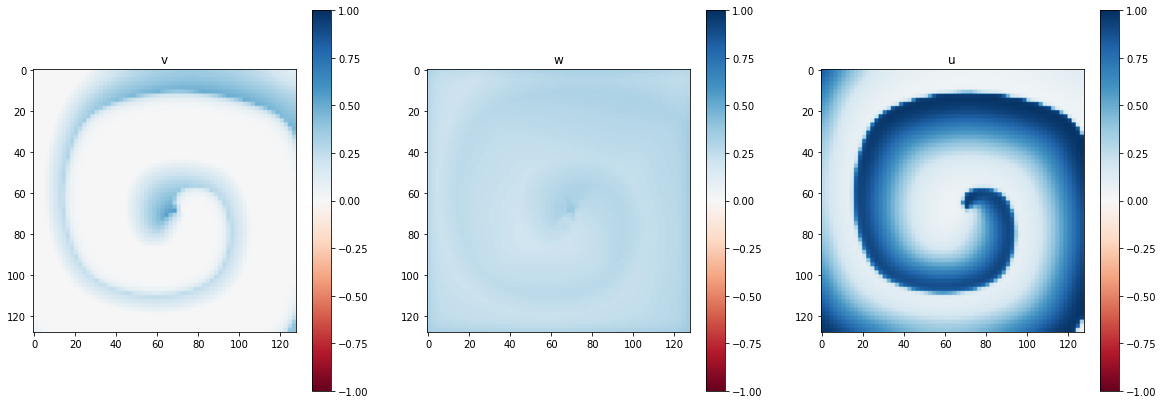

In [0]:
fig, ax = plt.subplots(1, 3, figsize=(20, 7))
im = ax[0].imshow(state[0], vmin=-1, vmax=1, cmap="RdBu")
plt.colorbar(im, ax=ax[0])
ax[0].set_title("v")
im = ax[1].imshow(state[1], vmin=-1, vmax=1, cmap="RdBu")
plt.colorbar(im, ax=ax[1])
ax[1].set_title("w")
im = ax[2].imshow(state[2], vmin=-1, vmax=1, cmap="RdBu")
plt.colorbar(im, ax=ax[2])
ax[2].set_title("u")